In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:\deployment\web_app")
df=pd.read_csv("train.csv")
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


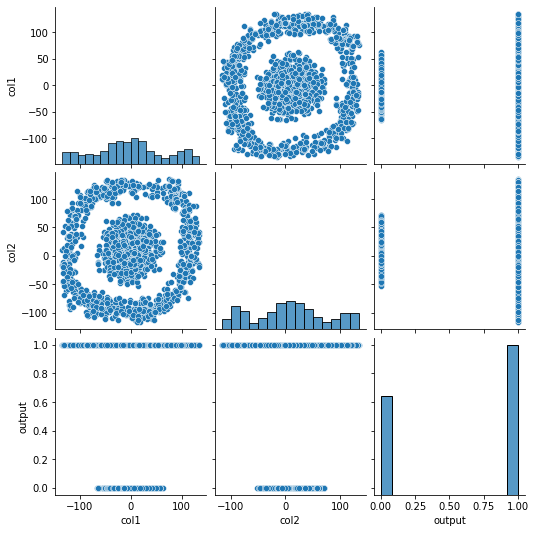

In [3]:
sns.pairplot(df)

<AxesSubplot:xlabel='col1'>

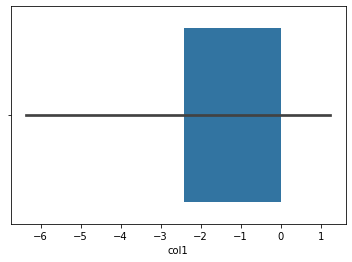

In [4]:
sns.barplot(x='col1', data=df)

<AxesSubplot:xlabel='output', ylabel='count'>

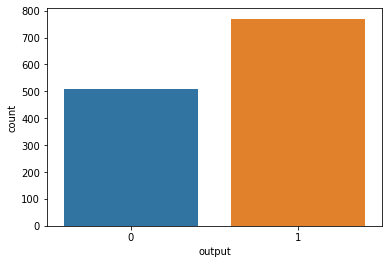

In [5]:
sns.countplot(x='output', data=df)

In [6]:
X=df.drop(["output"],axis = 1)
y=df["output"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((958, 2), (320, 2), (958,), (320,))

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = lr.predict(X_test)

In [13]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.628125

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0 119]
 [  0 201]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.63      1.00      0.77       201

    accuracy                           0.63       320
   macro avg       0.31      0.50      0.39       320
weighted avg       0.39      0.63      0.48       320



In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
y_pred = svc.predict(X_test)

In [17]:
metrics.accuracy_score(y_test, y_pred)

0.628125

In [18]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0 119]
 [  0 201]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.63      1.00      0.77       201

    accuracy                           0.63       320
   macro avg       0.31      0.50      0.39       320
weighted avg       0.39      0.63      0.48       320



In [19]:
svcr = SVC(kernel='rbf',probability=True)
svcr.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [20]:
y_pred = svcr.predict(X_test)

In [21]:
metrics.accuracy_score(y_test, y_pred)

1.0

In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[119   0]
 [  0 201]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       201

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [23]:
import pickle

In [24]:
from pickle import dump

dump(svcr, open('D:\deployment\web_app\Pickle_lr_Model.pkl', 'wb'))

In [25]:
from pickle import load

In [26]:
def predict(arr):
    classifier = load(open('D:\deployment\web_app\Pickle_lr_Model.pkl', 'rb'))
    prediction = classifier.predict(arr)
    return prediction

In [27]:
Value_1=input('Enter Value_1 :')
Value_2=input('Enter Value_2 :')
arr = np.array([Value_1,Value_2]).reshape(1,-1)

prediction = predict(arr)

print(prediction)

Enter Value_1 :-33
Enter Value_2 :122
[1]
